<a href="https://colab.research.google.com/github/Maxim323/Implementarea-Fuzzy/blob/main/ImplementareFuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:

import numpy as np
import matplotlib.pyplot as plt

import skfuzzy as fuzz
from skfuzzy import control


In [5]:
pip install -U scikit-fuzzy

Requirement already up-to-date: scikit-fuzzy in /usr/local/lib/python3.7/dist-packages (0.4.2)


In [6]:
np.arange(-1,1,0.1)

array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
        2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
        6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01])

In [7]:
UnivDiscIn = np.arange(-1,1,0.00001)
UnivDiscOut = np.arange(-1,1,0.00001)

In [8]:
e = control.Antecedent(UnivDiscIn, 'e')
de = control.Antecedent(UnivDiscIn, 'de')
u = control.Consequent(UnivDiscOut, 'u')

In [9]:
e['NB'] = fuzz.trapmf(e.universe,[-0.9894, -0.9894, -0.3894, -0.1894])
e['NS'] = fuzz.trapmf(e.universe, [-0.3, -0.15, -0.1, 0])
e['ZE'] = fuzz.trimf(e.universe, [-0.1, 0, 0.1])
e['PS'] = fuzz.trapmf(e.universe, [0, 0.1, 0.15, 0.25])
e['PB'] = fuzz.trapmf(e.universe,  [0.15, 0.25, 1, 1])

In [10]:
de['NE'] = fuzz.trapmf(de.universe, [-1, -1, -0.9, 0])
de['ZE'] = fuzz.trimf(de.universe,  [-0.9, 0, 0.17])
de['PO'] = fuzz.trapmf(de.universe,  [0, 0.17, 1, 1])

In [11]:
u['NB'] = fuzz.trapmf(u.universe, [-1, -1, -0.25, -0.15])
u['NS'] = fuzz.trapmf(u.universe,  [-0.25, -0.15, -0.1, 0])
u['ZE'] = fuzz.trimf(u.universe,  [-0.1, 0, 0.2])
u['PS'] = fuzz.trapmf(u.universe,  [0, 0.2, 0.6, 0.9])
u['PB'] = fuzz.trapmf(u.universe,   [0.6, 0.9, 1, 1])

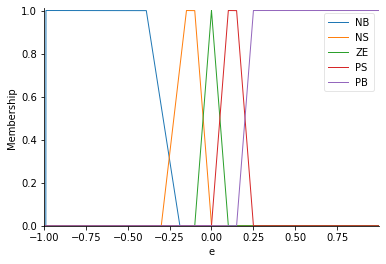

In [12]:
e.view()

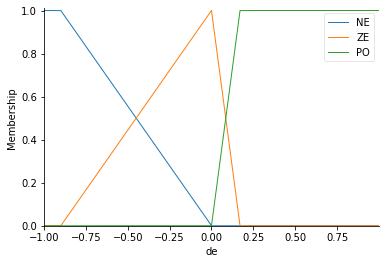

In [13]:
de.view()

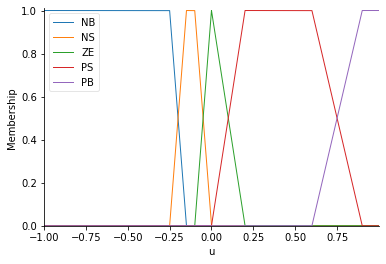

In [14]:
u.view()

In [15]:
r1 = control.Rule(e['NB'] & de['NE'] , u['NB'])
r2 = control.Rule(e['NB'] & de['ZE'] , u['NB'])
r3 = control.Rule(e['NB'] & de['PO'] , u['NB'])
r4 = control.Rule(e['NS'] & de['NE'] , u['NB'])
r5 = control.Rule(e['NS'] & de['ZE'] , u['NB'])
r6 = control.Rule(e['NS'] & de['PO'] , u['NS'])
r7 = control.Rule(e['ZE'] & de['NE'] , u['PS'])
r8 = control.Rule(e['ZE'] & de['ZE'] , u['PS'])
r9 = control.Rule(e['ZE'] & de['PO'] , u['PS'])
r10 = control.Rule(e['PS'] & de['NE'] , u['PB'])
r11 = control.Rule(e['PS'] & de['ZE'] , u['PB'])
r12 = control.Rule(e['PS'] & de['PO'] , u['PB'])
r13 = control.Rule(e['PB'] & de['NE'] , u['PB'])
r14 = control.Rule(e['PB'] & de['ZE'] , u['PB'])
r15 = control.Rule(e['PB'] & de['PO'] , u['PB'])


In [16]:
fuzzy = control.ControlSystem([r1,r2,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,r13,r14,r15])

In [17]:
sim = control.ControlSystemSimulation(fuzzy)

In [18]:
sim.input['e'] = 0.15
sim.input['de']= 1

In [19]:
sim.compute()

In [20]:
sim.output

OrderedDict([('u', 0.8599943999691533)])